In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Question 1

In [2]:
np.random.seed(42)
r=5 
c=4
array_1=np.random.randint(1, 51, size= (r,c))
print(array_1)
print("\nQues 1.1:",
      " ".join(str(array_1[i, c-1-i]) for i in range(min(r, c))))

print("\nQues 1.2:", end=" ")
row_maxes = [array_1[i, :].max() for i in range(r)]   
print(*row_maxes)

print("\nQues 1.3:", end=" ")
array_mean = array_1.mean()
print(f"Mean of array: {array_mean}")
new_vals = []                         
for i in range(r):                     
    for j in range(c):                 
        if array_1[i, j] < array_mean:   
            new_vals.append(array_1[i, j])
new_arr = np.array(new_vals)
print("\tElements below mean:", new_arr)

def numpy_boundary_traversal(matrix: np.ndarray):
    if matrix.ndim != 2:
        raise ValueError("Input must be a 2-D array")
    rows, cols = matrix.shape
    if rows == 0 or cols == 0:
        return []                      

    boundary = []

    for j in range(cols):
        boundary.append(int(matrix[0, j]))

    for i in range(1, rows - 1):
        boundary.append(int(matrix[i, cols - 1]))

    if rows > 1:
        for j in range(cols - 1, -1, -1):
            boundary.append(int(matrix[rows - 1, j]))

    if cols > 1:
        for i in range(rows - 2, 0, -1):
            boundary.append(int(matrix[i, 0]))

    return boundary
print(f'\nQues 1.4: {numpy_boundary_traversal(array_1)}')

[[39 29 15 43]
 [ 8 21 39 19]
 [23 11 11 24]
 [36 40 24  3]
 [22  2 24 44]]

Ques 1.1: 43 39 11 36

Ques 1.2: 43 39 24 40 44

Ques 1.3: Mean of array: 23.85
	Elements below mean: [15  8 21 19 23 11 11  3 22  2]

Ques 1.4: [39, 29, 15, 43, 19, 24, 3, 44, 24, 2, 22, 36, 23, 8]


# Question 2

In [3]:
np.random.seed(42)  
r = 20
arr = np.random.uniform(0, 11, r) 
print(np.round(arr, 2)) 

max, min, median =0,0,0
for i in range(r):
    if i > arr[i]:
        max= arr[i]
    else:
        min=arr[i]
print(f'\nQues 2.2:\nMax is : {max:.3f}\nMin is : {min:.3f}\nMed is : {np.median(arr):.3f}')

arr_copy = np.where(arr < 5, arr**2, arr)
print(f'\nQues 2.3: Sqaure if < 5:\n{arr_copy}')

def numpy_alternate_sort(array):
    arr = np.asarray(array).ravel().copy()   
    arr.sort()                               

    n = len(arr)
    out = np.empty(n, dtype=arr.dtype)       
    low = 0
    high = n - 1

    for i in range(n):
        if i % 2 == 0:
            out[i] = arr[low]
            low += 1
        else:
            out[i] = arr[high]
            high -= 1

    return out

print(f'\nQues 2.4: Aternate Sorted Array:\n{numpy_alternate_sort(arr)}')


[ 4.12 10.46  8.05  6.59  1.72  1.72  0.64  9.53  6.61  7.79  0.23 10.67
  9.16  2.34  2.    2.02  3.35  5.77  4.75  3.2 ]

Ques 2.2:
Max is : 3.204
Min is : 9.528
Med is : 4.436

Ques 2.3: Sqaure if < 5:
[16.97391638 10.45785737  8.05193336  6.58524333  2.94535976  2.94444914
  0.40821843  9.5279376   6.61226513  7.78879836  0.05127029 10.66900837
  9.15686905  5.45563565  4.00029856  4.07010292 11.20016443  5.77232075
 22.57575639 10.26254386]

Ques 2.4: Aternate Sorted Array:
[ 0.22642944 10.66900837  0.63891973 10.45785737  1.71593972  9.5279376
  1.71620504  9.15686905  2.00007464  8.05193336  2.01744961  7.78879836
  2.33573022  6.61226513  3.20352054  6.58524333  3.34666467  5.77232075
  4.11994131  4.75139521]


# Question 3

In [4]:
np.random.seed(42)
row=10
name = [
    "Asha", "Binod", "Charu", "Divya", "Endia",
    "Paijaan", "Lovely", "Coldplay", "Shubh", "Kr$na"
]

subject = ["Maths", "Physics", "Chemistry"]
score = np.random.randint(50, 101, size=row).tolist()
grade = [None] * len(name)   

df = pd.DataFrame({
    "name": name,
    "subject": np.random.choice(subject, size=row),
    "score": score,
    "grade": grade

})
df.head()

,name,subject,score,grade
0,Asha,Chemistry,88,None
1,Binod,Maths,78,None
2,Charu,Chemistry,64,None
3,Divya,Physics,92,None
4,Endia,Maths,57,None


In [5]:
for row in df.itertuples():           
    if   row.score >= 90: grade = "A"
    elif row.score >= 80: grade = "B"
    elif row.score >= 70: grade = "C"
    elif row.score >= 60: grade = "D"
    else:               grade = "F"

    df.loc[row.Index, "grade"] = grade
df.head()

,name,subject,score,grade
0,Asha,Chemistry,88,B
1,Binod,Maths,78,C
2,Charu,Chemistry,64,D
3,Divya,Physics,92,A
4,Endia,Maths,57,F


In [6]:
df = df.sort_values(by='score', ascending=False)
df.head()

,name,subject,score,grade
3,Divya,Physics,92,A
0,Asha,Chemistry,88,B
6,Lovely,Physics,88,B
1,Binod,Maths,78,C
8,Shubh,Physics,72,C


In [7]:
df.groupby('subject')['score'].mean()

subject
Chemistry    76.0
Maths        65.0
Physics      78.0
Name: score, dtype: float64

In [8]:
def pandas_filter_pass(dataframe):
    return dataframe[dataframe['grade'].isin(['A', 'B'])]
pandas_filter_pass(df)

,name,subject,score,grade
3,Divya,Physics,92,A
0,Asha,Chemistry,88,B
6,Lovely,Physics,88,B


# Question 4

In [9]:
random.seed(42) 
positive_adjectives = [
    "enjoyed", "amazing", "inspiring", "captivating", "brilliant", "emotional",
    "uplifting", "well-paced", "superb", "wonderful", "fantastic", "mind-blowing",
    "touching", "delightful", "engaging", "gripping", "excellent", "phenomenal",
    "masterful", "impressive", "enthralling", "mesmerizing", "rewarding", "strong",
    "deep", "meaningful"
]

negative_adjectives = [
    "boring", "dragging", "confusing", "flat", "awkward", "tedious",
    "predictable", "waste", "bullshit", "terrible", "horrible", "lame",
    "forgettable", "annoying", "incoherent", "cringe", "clumsy", "bad",
    "poor", "pathetic", "dull", "unwatchable", "poorly-made", "overacted",
    "ridiculous", "flat-out bad"
]

shared_templates = [
    "I thought it was incredibly {adj1} and {adj2}.",
    "Definitely a {adj1}, {adj2}, and {adj3} piece of cinema.",
    "One of the most {adj1} yet {adj2} movies I've seen.",
    "It turned out pretty {adj1}, maybe a bit {adj2} too.",
    "The cast performance was not just {adj1}, but also {adj2}.",
    "The ending felt very {adj1} and kind of {adj2}.",
    "The overall execution seemed {adj1} with a touch of {adj2}.",
    "Script and visuals were both {adj1} and {adj2}.",
    "The movie was absolutely {adj1}, even bordering on {adj2}.",
    "I found the storyline quite {adj1}, though occasionally {adj2}.",
    "It was a {adj1}, {adj2}, and {adj3} experience overall.",
    "The direction and pacing felt {adj1} but slightly {adj2} at times.",
    "Honestly, it seemed {adj1} from start to finish, maybe a bit {adj2} too.",
    "The character development was deeply {adj1} and {adj2}.",
    "A rather {adj1}, {adj2} watch, to be honest.",
]

def make_positive():
    template = random.choice(shared_templates)
    adjs = random.sample(positive_adjectives, template.count("{adj"))
    return template.format(**{f"adj{i+1}": adj for i, adj in enumerate(adjs)})

def make_negative():
    template = random.choice(shared_templates)
    adjs = random.sample(negative_adjectives, template.count("{adj"))
    return template.format(**{f"adj{i+1}": adj for i, adj in enumerate(adjs)})

reviews = [make_positive() for _ in range(50)] + [make_negative() for _ in range(50)]
sentiments = ["positive"] * 50 + ["negative"] * 50

# zip > shuffle > unzip(order remains same)
combined = list(zip(reviews, sentiments))
random.shuffle(combined)
reviews, sentiments = zip(*combined) #now unzipped but are in same shuffled order

df_movie = pd.DataFrame({"Review": reviews, "Sentiment": sentiments})
df_movie.head()

,Review,Sentiment
0,The direction and pacing felt masterful but sl...,positive
1,The direction and pacing felt flat but slightl...,negative
2,Script and visuals were both brilliant and sup...,positive
3,The ending felt very well-paced and kind of br...,positive
4,The overall execution seemed annoying with a t...,negative


In [10]:
from sklearn.feature_extraction import text
#80-20
X_train, X_test, y_train, y_test = train_test_split(
    df_movie["Review"],
    df_movie["Sentiment"],
    test_size=0.20,
    random_state=42,
    stratify=df_movie["Sentiment"]
)

def build_vectorizer(min_df):
    return CountVectorizer(
        ngram_range=(1, 2),      
        max_features=500,
        min_df=min_df,
        stop_words=list(my_stops)
    )

min_df = 5    
desired = 200
my_stops = text.ENGLISH_STOP_WORDS
while True:
    vect = build_vectorizer(min_df)
    X_train_vec = vect.fit_transform(X_train)
    feat_count = X_train_vec.shape[1]

    if feat_count >= desired or min_df <= 2:
        break  
    min_df -= 1  

print(f"min_df={min_df} and {feat_count} features")
X_test_vec = vect.transform(X_test)
print("Feature count:", X_train_vec.shape[1]) 
feats = vect.get_feature_names_out()
print(feats[:20])


min_df=2 and 120 features
Feature count: 120
['absolutely' 'amazing' 'awkward' 'bad' 'bit' 'bit inspiring' 'blowing'
 'bordering' 'boring' 'brilliant' 'bullshit' 'captivating' 'cast'
 'cast performance' 'character' 'character development' 'cinema' 'clumsy'
 'confusing' 'cringe']


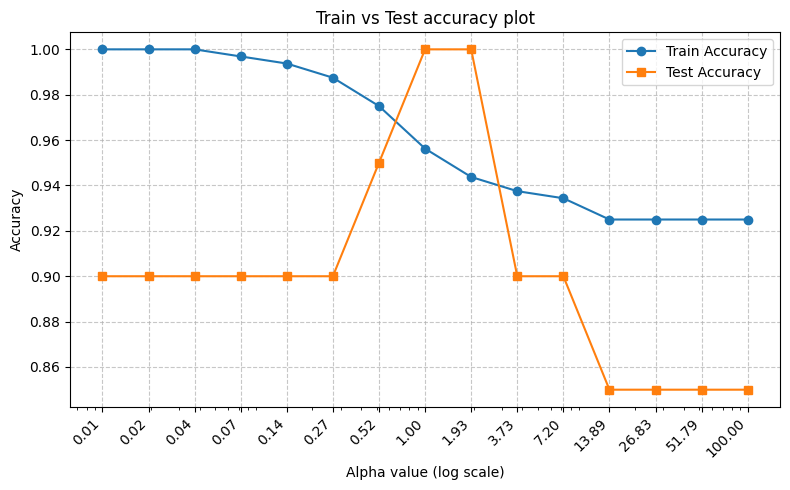

In [11]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# alpha on log scale
alphas = np.logspace(-2, 2, num=15)
param_grid = {"alpha": alphas}

# 10‑fold CV with train‑scores so we can plot them
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    return_train_score=True,
    n_jobs=-1,
    verbose=0
)
grid.fit(X_train_vec, y_train)

# extract metrics
train_acc = grid.cv_results_['mean_train_score']

# test accuracy for every alpha
test_acc = []
for a in alphas:
    best_model = MultinomialNB(alpha=a).fit(X_train_vec, y_train)
    test_acc.append(accuracy_score(y_test, best_model.predict(X_test_vec)))


# plot
plt.figure(figsize=(8,5))
plt.plot(alphas, train_acc, marker='o', label='Train Accuracy')
plt.plot(alphas, test_acc, marker='s', label='Test Accuracy')
plt.xscale('log')
alphas_sorted = sorted(alphas)                                
plt.xticks(alphas_sorted,                           
           [f"{a:.2f}" for a in alphas_sorted],          
           rotation=45, ha='right')    
plt.xlabel('Alpha value (log scale)')
plt.ylabel('Accuracy')
plt.title('Train vs Test accuracy plot')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
def predict_review_sentiment(model, vectorizer, review):

    review_vec = vectorizer.transform([review])
    prediction = model.predict(review_vec)
    return prediction[0]

review = "The plot was thrilling and the acting was phenomenal!"
print(f'Comment: {review}\nOutput: {predict_review_sentiment(best_model, vect, review)}')

review = "The plot was painfully predictable, and the characters felt flat and uninspired—definitely not worth the hype."
print(f'Comment: {review}\nOutput: {predict_review_sentiment(best_model, vect, review)}')


Comment: The plot was thrilling and the acting was phenomenal!
Output: positive
Comment: The plot was painfully predictable, and the characters felt flat and uninspired—definitely not worth the hype.
Output: negative


# Ques 5

In [13]:
random.seed(42)

positive_adjectives = [
    "helpful", "knowledgeable", "engaging", "clear", "dedicated", "patient",
    "motivating", "understanding", "insightful", "friendly", "well-prepared",
    "organized", "supportive", "professional", "interactive", "focused", "encouraging",
    "effective", "skillful", "approachable", "inspiring", "punctual", "reliable"
]

negative_adjectives = [
    "confusing", "rushed", "disengaging", "unprepared", "boring", "inattentive",
    "unclear", "unfriendly", "inconsistent", "unprofessional", "late", "distracted",
    "uninspiring", "repetitive", "ineffective", "dry", "awkward", "frustrating"
]

shared_templates = [
    "The tutor was incredibly {adj1} and {adj2}.",
    "Definitely a {adj1}, {adj2}, and {adj3} teaching experience.",
    "One of the most {adj1} yet {adj2} classes we've had.",
    "The sessions turned out pretty {adj1}, though sometimes a bit {adj2}.",
    "The explanations were not just {adj1}, but also {adj2}.",
    "The teaching felt very {adj1} with hints of {adj2}.",
    "The overall learning experience was {adj1} and occasionally {adj2}.",
    "Concepts were explained in a {adj1} and {adj2} way.",
    "The tutor was absolutely {adj1}, even bordering on {adj2}.",
    "We found the lessons quite {adj1}, although slightly {adj2} at times.",
    "It was a {adj1}, {adj2}, and {adj3} learning journey.",
    "The approach felt {adj1}, but slightly {adj2} in delivery.",
    "Honestly, the experience seemed {adj1}, maybe a bit {adj2} too.",
    "The subject was taught in a very {adj1} and {adj2} manner.",
    "A rather {adj1}, {adj2} experience overall for my child.",
]

def make_positive():
    template = random.choice(shared_templates)
    adjs = random.sample(positive_adjectives, template.count("{adj"))
    return template.format(**{f"adj{i+1}": adj for i, adj in enumerate(adjs)})

def make_negative():
    template = random.choice(shared_templates)
    adjs = random.sample(negative_adjectives, template.count("{adj"))
    return template.format(**{f"adj{i+1}": adj for i, adj in enumerate(adjs)})


# Build 50 + 50 reviews
reviews = [make_positive() for _ in range(50)] + [make_negative() for _ in range(50)]
sentiments = ["positive"] * 50 + ["negative"] * 50

# zip > shuffle > unzip(order remains same)
combined = list(zip(reviews, sentiments))
random.shuffle(combined)
reviews, sentiments = zip(*combined) #now unzipped but are in same shuffled order

df_product= pd.DataFrame({"Review": reviews, "Sentiment": sentiments})
df_product.head()

,Review,Sentiment
0,"The tutor was absolutely focused, even borderi...",positive
1,"The approach felt effective, but slightly enga...",positive
2,"Honestly, the experience seemed well-prepared,...",positive
3,The overall learning experience was approachab...,positive
4,"The tutor was absolutely ineffective, even bor...",negative


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd

custom_stops = [w.lower() for w in text.ENGLISH_STOP_WORDS.union({"tutor", "student"})]
tfidf = TfidfVectorizer(
    stop_words=custom_stops,  
    lowercase=True,
    max_features=300,
    ngram_range=(1, 2)
)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df_product["Review"],
    df_product["Sentiment"],
    test_size=0.25,
    random_state=42,
    stratify=df_product["Sentiment"]
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print("Precision :", precision_score(y_test, y_pred, pos_label='positive'))
print("Recall    :", recall_score(y_test, y_pred, pos_label='positive'))
print("F1 Score  :", f1_score(y_test, y_pred, pos_label='positive'))

Precision : 0.9230769230769231
Recall    : 1.0
F1 Score  : 0.96


In [17]:
# function to transform and sparse TF‑IDF matrix 
def text_preprocess_vectorize(texts, vectorizer):
    
    if not hasattr(vectorizer, "vocabulary_"):
        raise ValueError("`vectorizer` must be fitted before calling this function.")
    return vectorizer.transform(texts)

X_train_function = tfidf.fit_transform(X_train)
X_test_function = text_preprocess_vectorize(X_test, tfidf)

print("Shape :", X_test_function.shape)         
print("Matrix:\n", X_test_function.toarray())  

Shape : (25, 300)
Matrix:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.37404899 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
